In [9]:
# Import Numpy & PyTorch
import numpy as np

In [10]:
# Input (temp, rainfall, humidity)
X = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [11]:
# Target (apples)
Y = np.array([[56], 
                    [81], 
                    [119], 
                    [22], 
                    [103]], dtype='float32')

In [12]:
mu = np.mean(X, 0)
sigma = np.std(X, 0)
#normalizing the input
X = (X-mu) / sigma
X = np.hstack((np.ones((Y.size,1)),X))
print(X.shape)

(5, 4)


In [13]:
# Weights and biases
rg = np.random.default_rng(12)
w = rg.random((1, 4))
print(w)

[[0.25082446 0.94675294 0.18932038 0.17929141]]


In [14]:
# MSE loss function
def mse(t1, t2):
    diff = t1 - t2
    return np.sum(diff * diff) / diff.size

In [15]:
# Define the model
def model(x,w):
    return x @ w.T

In [16]:
# Compute error
preds = model(X,w)
cost_initial = mse(preds, Y)
print("Cost before regression: ",cost_initial)

Cost before regression:  6961.124340607171


In [17]:
def gradient_descent(X, y, w, learning_rate, n_iters):
    J_history = np.zeros((n_iters,1))
    for i in range(n_iters):
        h = model(X,w)
        diff = h - y
        delta = (learning_rate/Y.size)*(X.T@diff)
        new_w = w - delta.T
        w=new_w
        J_history[i] = mse(h, y)
    return (J_history, w)

In [18]:
import matplotlib.pyplot as plt
n_iters = 500
learning_rate = 0.01

initial_cost = mse(model(X,w),Y)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, Y, w, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

Initial cost is:  6961.124340607171 

Optimal parameters are: 
 [[75.70097746 -4.33569711 23.97784973 10.64122441]] 

Final cost is:  [3.24336209]


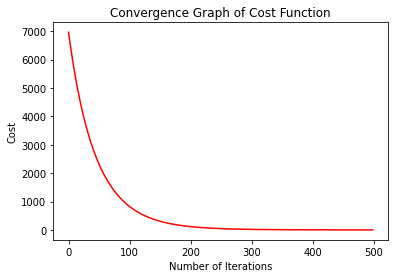

In [19]:
plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [20]:
# Calculate error
preds = model(X,optimal_params)
cost_final = mse(preds, Y)
# Print predictions
print("Prediction:\n",preds)
# Comparing predicted with targets
print("Targets:\n",Y)

Prediction:
 [[ 55.41796548]
 [ 83.39462719]
 [116.02114736]
 [ 20.94681904]
 [102.72432753]]
Targets:
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [21]:
print("Cost after linear regression: ",cost_final)
print("Cost reduction percentage : {} %".format(((cost_initial- cost_final)/cost_initial)*100))

Cost after linear regression:  3.2263504141825856
Cost reduction percentage : 99.95365187782436 %
